### Data Science Job Salaries Dataset

- This dataset contains details regarding the salaries of different Data science professionals in the United States based on factors like employment type, company location, etc. for the year 2020, 2021 and 2022.
- Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026. And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis drives decision-making.
- The dataset will be explored so that we can get insights on some data-driven questions

#### Feature Description

- work_year - The year the salary was paid.
- Experience level - The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
- Emploment type - The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- Job title - The role worked in during the year.
- Salary - The total gross salary amount paid.
- Salary in Usd - The total gross salary amount paid in USD
- Salary Currency - The currency of the salary paid as an ISO 4217 currency code.
- Employee Residence Employee's primary country of residence in during the work year as an ISO 3166 country code.
- Remote ratio - The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- Company Location - The country of the employer's main office or contracting branch as an ISO 3166 country code.
- Company Size - The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [455]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np
#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [502]:
# Loading of the dataset
data = pd.read_csv('ds_salaries.csv', index_col = False)

In [457]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [458]:
data.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [459]:
data.shape

(607, 12)

- The dataset consists of 607 rows and 12 columns

In [460]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [461]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


- The minimum salary in USD is 2,859USD while the maximum salary is 600,000USD. The average salary in USD per annum is 112,298USD, while the work year is between 2020 and 2022

In [462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


### Data Cleaning

#### Checking for missing values

In [463]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

- There are no missing values in the dataset

In [464]:
#Delete column uunamed:0
data.drop(columns=['Unnamed: 0'], inplace=True)

- Column 'Unnamed: 0' was dropped from the dataset as it is not relevant

#### Checking and deleting duplicates

In [465]:
data.duplicated().sum()

42

In [466]:
data = data.drop_duplicates()

In [467]:
data.duplicated().sum()

0

In [468]:
#Creating rating function to check if Data Scientists worked Fully Remote, Partially Remote or No remote
def rating_function(x):
    if x == 0:
        return "No Remote"
    elif x == 50:
        return "Partially Remote"
    else:
        return "Fully Remote"

In [469]:
data["remote_ratio_rating"] = data["remote_ratio"].apply(rating_function)

In [470]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,remote_ratio_rating
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,No Remote
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,No Remote
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Partially Remote
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,No Remote
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Partially Remote


In [471]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,remote_ratio_rating
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,Fully Remote
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,Fully Remote
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,No Remote
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,Fully Remote
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L,Fully Remote


In [501]:
#Checking for Unique values
data.nunique()

work_year                3
experience_level         4
employment_type          4
job_title               50
salary                 272
salary_currency         17
salary_in_usd          369
employee_residence      57
remote_ratio             3
company_location        50
company_size             3
remote_ratio_rating      3
dtype: int64

In [473]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size',
       'remote_ratio_rating'],
      dtype='object')

In [474]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            565 non-null    int64 
 1   experience_level     565 non-null    object
 2   employment_type      565 non-null    object
 3   job_title            565 non-null    object
 4   salary               565 non-null    int64 
 5   salary_currency      565 non-null    object
 6   salary_in_usd        565 non-null    int64 
 7   employee_residence   565 non-null    object
 8   remote_ratio         565 non-null    int64 
 9   company_location     565 non-null    object
 10  company_size         565 non-null    object
 11  remote_ratio_rating  565 non-null    object
dtypes: int64(4), object(8)
memory usage: 57.4+ KB


#### Exploratory Data Analysis

##### Univariate Analysis


Text(0.5, 1.0, 'Bar Chart For Experience Level')

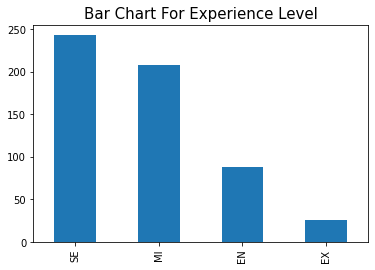

In [475]:
#Experience Level Counts
data.experience_level.value_counts().plot.bar()
plt.title("Bar Chart For Experience Level", fontsize=15)

- Senior Level position tops the employee list on the experience level count, followed by Mid-Level position.
- The Executive level position is the least on the experience level count

Text(0.5, 1.0, 'Bar Chart For Employment Type')

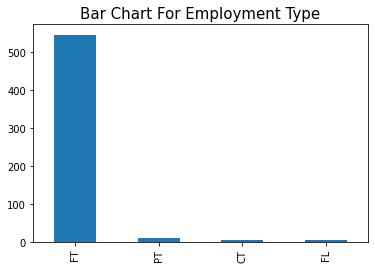

In [476]:
#Employment type counts
data.employment_type.value_counts().plot.bar()
plt.title("Bar Chart For Employment Type", fontsize=15)

- Almost all the Data Scientists in the U.S. are employed on Full time position

In [477]:
#Employee Residence & Company Location
emp_loc = data.groupby('employee_residence').count()['company_location'].sort_values(ascending=False)[:10]
emp_loc

employee_residence
US    295
GB     43
IN     30
CA     27
DE     24
FR     18
ES     15
GR     12
JP      7
PK      6
Name: company_location, dtype: int64

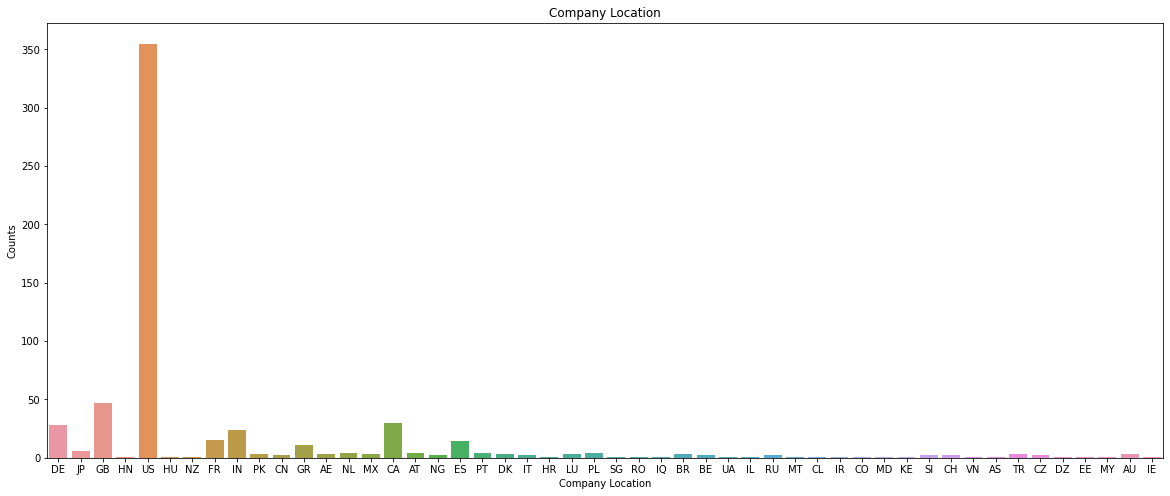

In [505]:
plt.figure(figsize=(20,8))
plt.title('Company Location')
sns.countplot(x='company_location', data=data)
plt.xlabel('Company Location')
plt.ylabel('Counts')
plt.show()

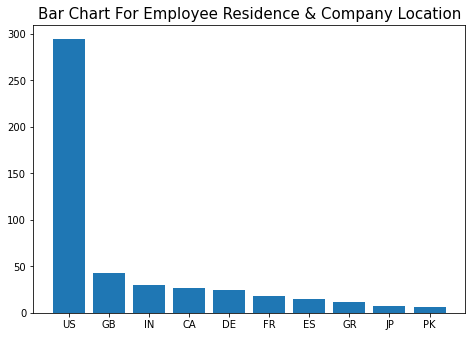

In [478]:
#plot bar chart
fig = plt.figure()

ax = fig.add_axes([3,3,1,1])
ax.bar(emp_loc.index, emp_loc.values)

plt.title("Bar Chart For Employee Residence & Company Location", fontsize=15)

plt.show()

- Almost 300 employees reside and work in US, which accounts for the highest number of the employees, while the remaining employees are spread across different countries.

Text(0, 0.5, 'Count of Company Size')

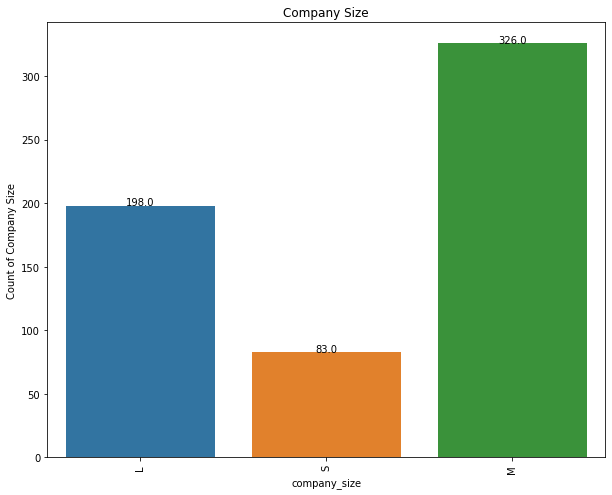

In [508]:
fig, ax1 = plt.subplots(figsize = (10, 8))
viz = sns.countplot(ax=ax1, x="company_size", data=data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title("Company Size")
plt.ylabel("Count of Company Size")

- Most Employees are working in Medium size category, compared with the Employees in Large and Small categories

Text(0, 0.5, 'Count')

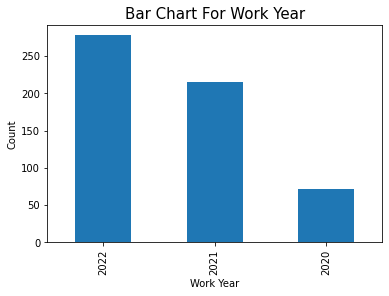

In [480]:
data.work_year.value_counts().plot.bar()
plt.title("Bar Chart For Work Year", fontsize=15)
plt.xlabel('Work Year')
plt.ylabel('Count')

Text(0.5, 1.0, 'Work Year')

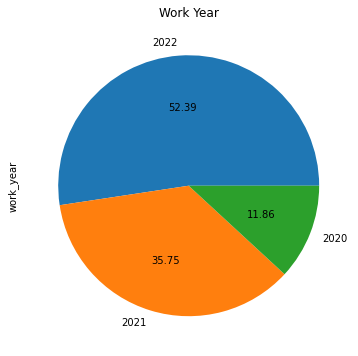

In [507]:
# Using Pie chat for better explanation
plt.figure(figsize=(6,6))
data['work_year'].value_counts().plot.pie(autopct='%.2f')
plt.title('Work Year')

- The number of Data Scientists that worked in Year 2022 surpassed the previous years. The figure was very low in 2020, but increased by over 200% in 2021 and 400% in 2022. This shows that there is an increased demand for data scientists. 

<Figure size 720x432 with 0 Axes>

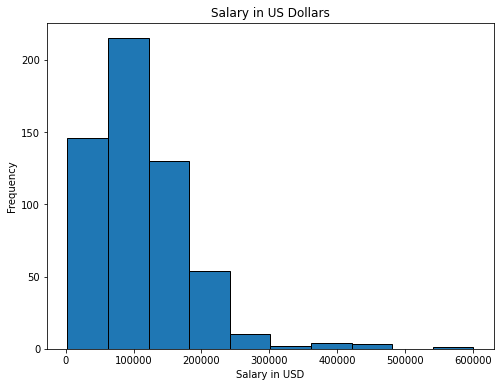

<Figure size 720x432 with 0 Axes>

In [481]:
#Salary in USD
plt.figure(figsize=(8,6))
plt.hist(data.salary_in_usd, edgecolor='black')
plt.title('Salary in US Dollars')

plt.ylabel('Frequency')
plt.xlabel('Salary in USD')
plt.figure(figsize=(10,6))

- Approximately 220 employees earn between 60,000USD and 120,000USD annualy,   also 145 employees earn between 3000USD and 60,000USD, while the maximum salary is 600,000USD

Text(0.5, 1.0, 'Job Title')

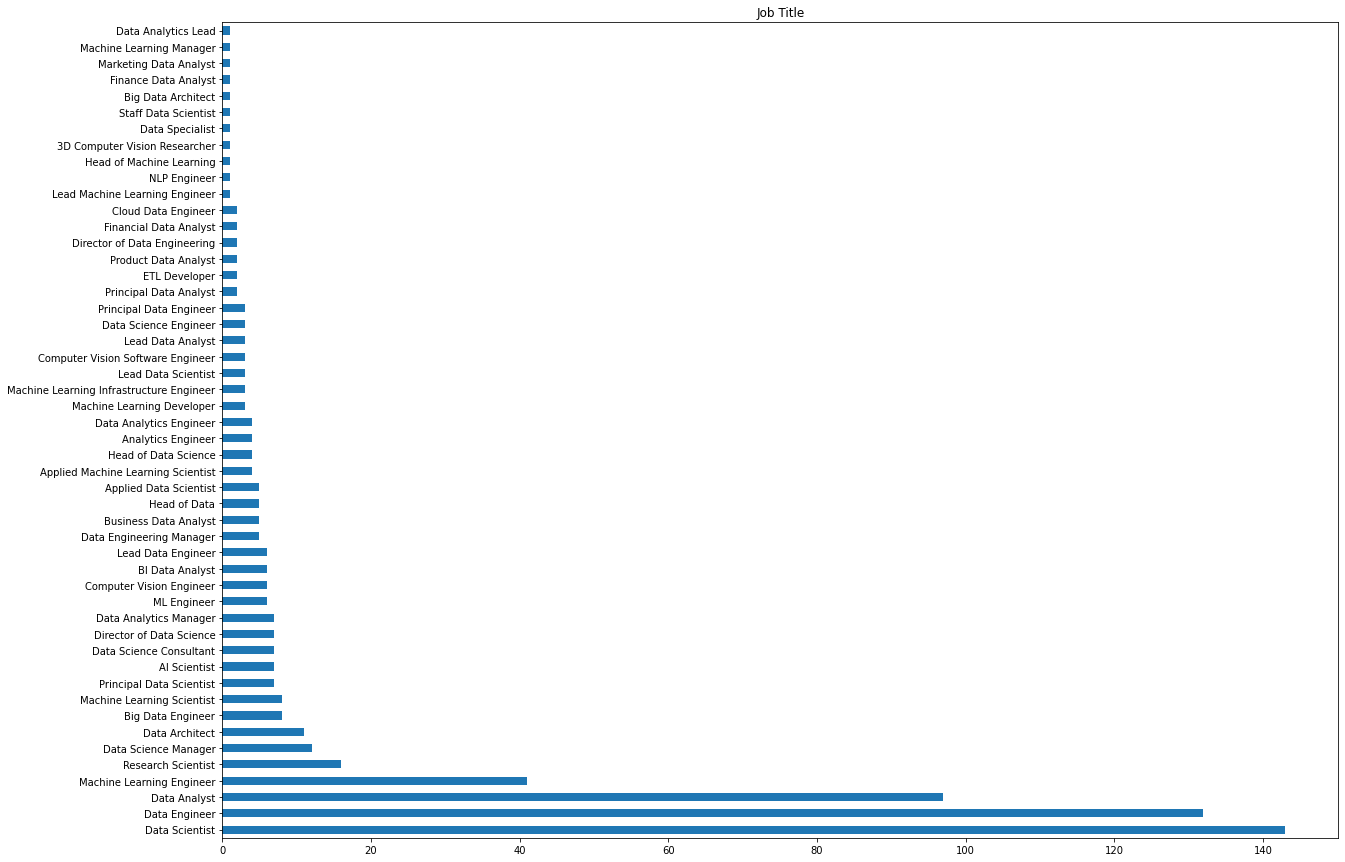

In [503]:
plt.figure(figsize=(20,15))
data['job_title'].value_counts().plot.barh()
plt.title('Job Title')

Text(0, 0.5, 'Count')

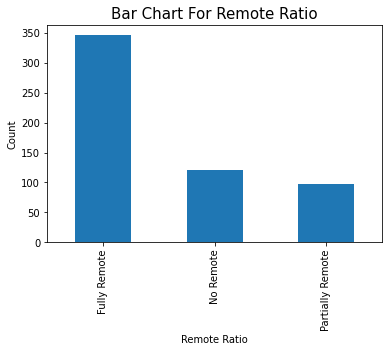

In [482]:
data.remote_ratio_rating.value_counts().plot.bar()
plt.title("Bar Chart For Remote Ratio", fontsize=15)
plt.xlabel('Remote Ratio')
plt.ylabel('Count')


- Around 340 employees are working fully remote, compared with 120 employees that are working on no remote 

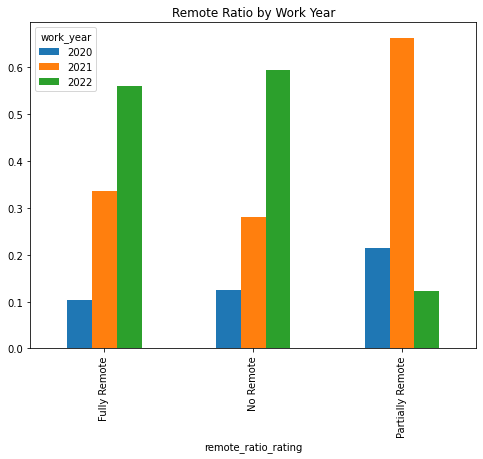

In [483]:
#Remote ratio by work year
#create pivot of Remote ratio by work year
remote_work_year = pd.crosstab(data.remote_ratio_rating,data.work_year,normalize='index')

#plot the data
remote_work_year.plot.bar(figsize=(8,6))

plt.title('Remote Ratio by Work Year')
plt.show()

- The number of empoloyees that worked fully remote from 2020 to 2021 increased by 240%, the figure also increased by 75% between 2021 and 2022. There is a sharp decline of over 400% on the number of employees that worked partially remote between 2021 and 2022. Also, the number of employees that worked on No remote rapidly increased between 2020 and 2022. This shows that most employees are now working on No remote

In [484]:
#Employment Type by Experience Level

employment_experience_table = pd.crosstab(index=data["employment_type"], columns=data["experience_level"])
employment_experience_table

experience_level,EN,EX,MI,SE
employment_type,,,,
CT,2,1,1,1
FL,0,0,3,1
FT,79,25,201,241
PT,7,0,3,0


<AxesSubplot: xlabel='employment_type'>

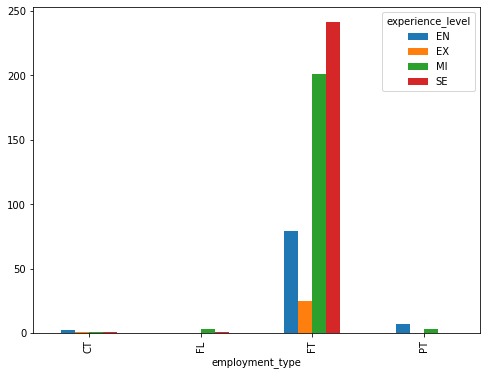

In [485]:
employment_experience_table.plot(kind="bar", figsize=(8,6))

- Majority of the company's workforce are Full Staff, with Senior Level having the highest number of employees, followed by Mid Level

In [486]:
#Top 3 Job Title by Experience Level
job_experience_table = data.groupby('job_title').experience_level.count().sort_values(ascending=False)[:3]
job_experience_table

job_title
Data Scientist    130
Data Engineer     121
Data Analyst       82
Name: experience_level, dtype: int64

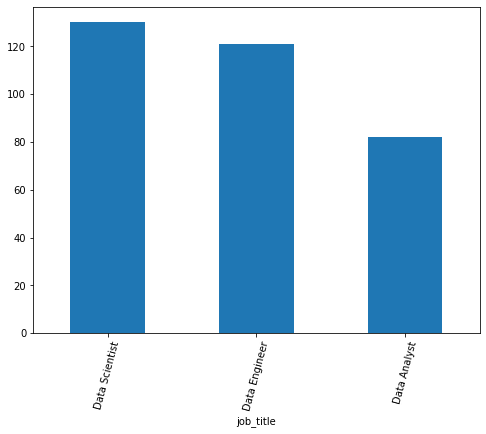

In [487]:
job_experience_table.plot(kind="bar", figsize=(8,6))
plt.tick_params(axis='x', labelrotation = 75)

- The three job titles by experience level are Data Scientists, Data Engineer and Data Analysts

In [488]:
#Company Size by Experience Level

size_experience_table = pd.crosstab(index=data["company_size"], columns=data["experience_level"])
size_experience_table

experience_level,EN,EX,MI,SE
company_size,,,,
L,29,11,84,69
M,30,12,96,152
S,29,3,28,22


<AxesSubplot: xlabel='company_size'>

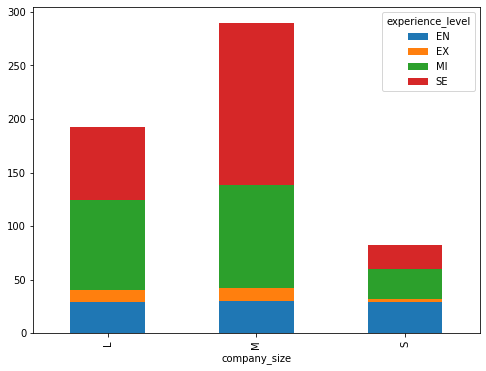

In [489]:
size_experience_table.plot(kind="bar", figsize=(8,6), stacked=True)

- Medium Size category have the highest number of employees in the company, with Senior Level staff having the highest in the category

Text(0, 0.5, 'Count')

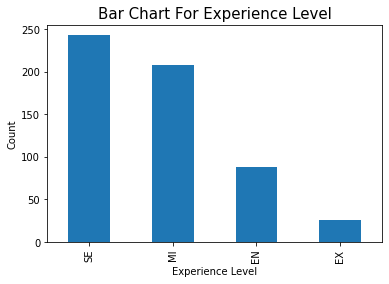

In [490]:
#Experience Level
data.experience_level.value_counts().plot.bar()
plt.title("Bar Chart For Experience Level", fontsize=15)
plt.xlabel('Experience Level')
plt.ylabel('Count')

- The Company employs more Senior Level staff than other levels of staff. The Executive Level category has the lowest number of employees

In [491]:
#Salary by work year
sal_year_table = data.groupby('work_year').salary.sum().sort_values(ascending=False)
sal_year_table

work_year
2021    118352233
2022     45151490
2020     27531809
Name: salary, dtype: int64

<AxesSubplot: xlabel='work_year'>

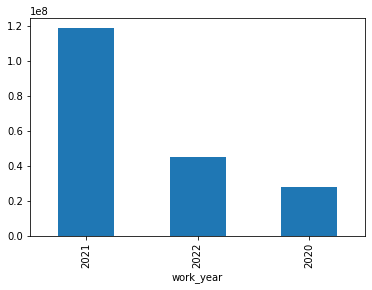

In [492]:
sal_year_table.plot(kind="bar")

- The company spent more on salary in year 2021 more than other years. However, the figure drastically reduced by over 200% in year 2022

In [493]:
#Salary by Experience Level
sal_exp_table = data.groupby('experience_level').salary.sum().sort_values(ascending=False)
sal_exp_table

experience_level
MI    101926808
SE     54718073
EN     23286776
EX     11103875
Name: salary, dtype: int64

<AxesSubplot: xlabel='experience_level'>

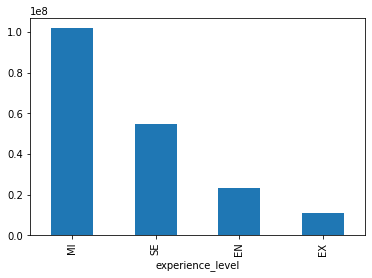

In [494]:
sal_exp_table.plot(kind="bar")

- The Mid-Level staff have the highest cumulative salary, followed by the Senior Level category

In [495]:
#Salary by Company Size
sal_size_table = data.groupby('company_size').salary.sum().sort_values(ascending=False)
sal_size_table

company_size
L    116770912
M     42972689
S     31291931
Name: salary, dtype: int64

<AxesSubplot: xlabel='company_size'>

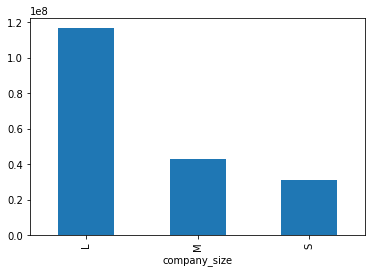

In [496]:
sal_size_table.plot(kind="bar")

- Large size company have the highest cumulative salary, followed by Medium and then Low

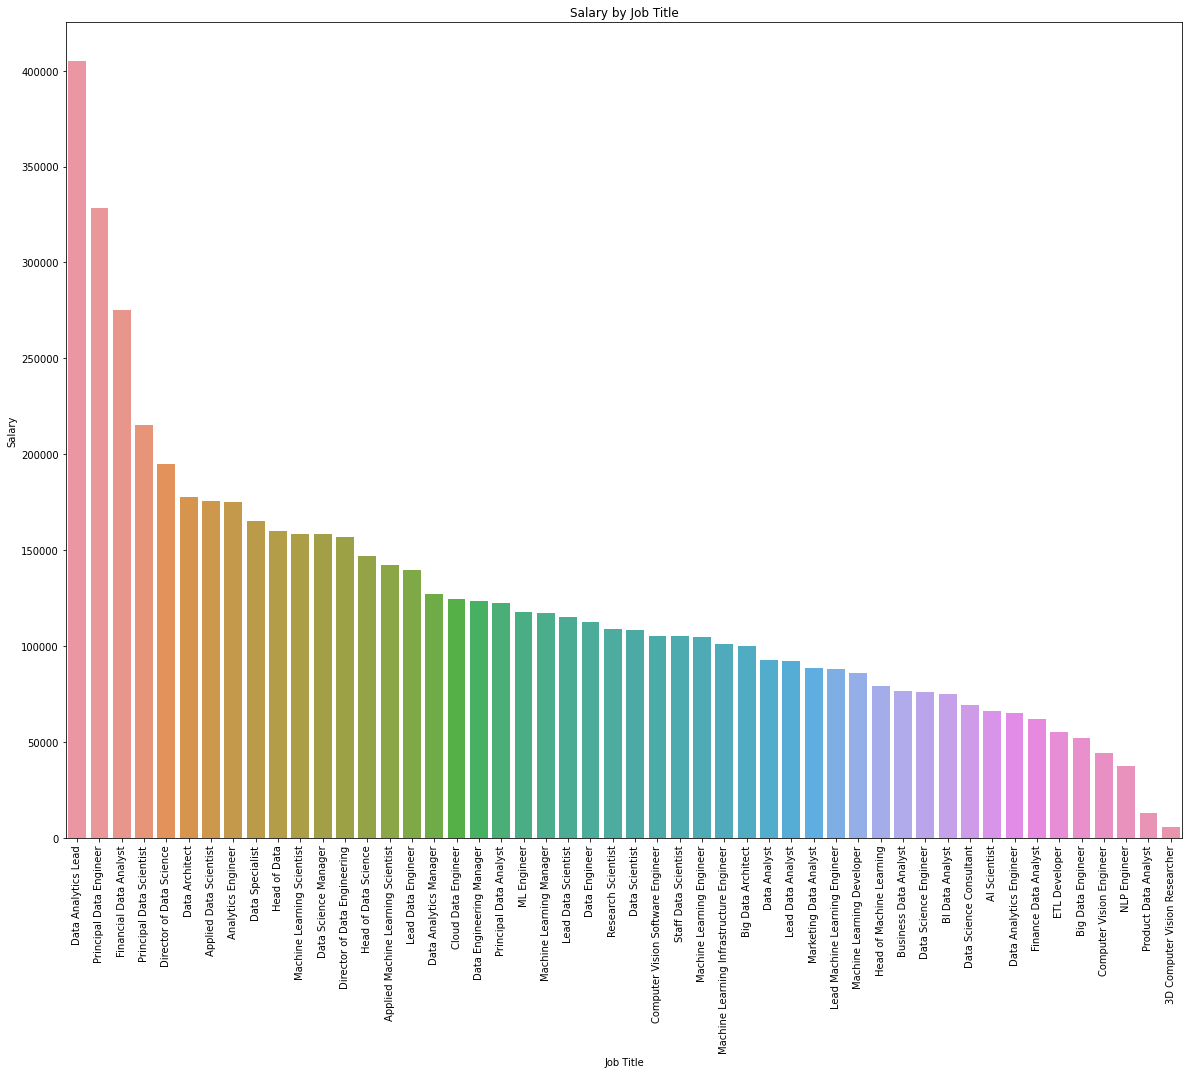

In [510]:
#Highest salaries by job title
data.salary_in_usd = data.salary_in_usd.astype(float)
salary_list = list(data['job_title'].unique())
salary_ratio = []
for i in salary_list:
    x = data[data['job_title']==i]
    salary_rate = sum(x.salary_in_usd)/len(x)
    salary_ratio.append(salary_rate)
df1 = pd.DataFrame({'salary_list':salary_list,'salary_ratio':salary_ratio})
new_index = (df1['salary_ratio'].sort_values(ascending=False)).index.values
sorted_data = df1.reindex(new_index)

# showing visualization
plt.figure(figsize=(20,15))
sns.barplot(x=sorted_data['salary_list'], y=sorted_data['salary_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Salary by Job Title')
plt.show()

- The professions that have the highest salaries are Data Analytics Lead, Principal Data Engineers & Financial Data Analysts

In [499]:
#Average Salary by Company Location
avg_sal_location_table = data.groupby('company_location').salary.mean().sort_values(ascending=False)[:10]
avg_sal_location_table

company_location
CL    3.040000e+07
HU    1.100000e+07
JP    3.408667e+06
IN    2.065208e+06
AS    1.335000e+06
MX    2.793333e+05
CH    2.750000e+05
CN    1.995000e+05
US    1.930337e+05
DK    1.850000e+05
Name: salary, dtype: float64

<AxesSubplot: xlabel='company_location'>

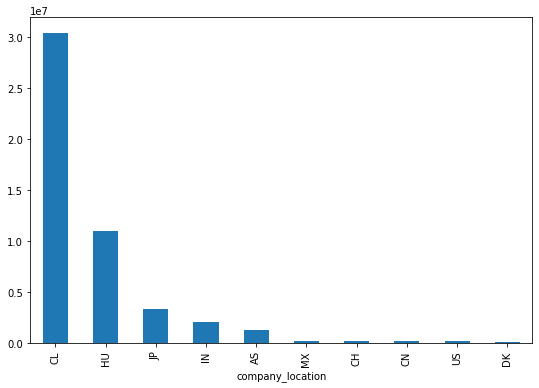

In [500]:
avg_sal_location_table.plot(kind="bar", figsize=(9,6))

- Location 'CL' has the highest average salary, followed by HU

#### In conclusion, the demand for data scientists is on the increase level, especially on the Mid-Level and Senior Level categories. Data Analytics Lead, Principal Data Engineers & Financial Data Analysts are the highest paid profession in the industry.